## Importando Bibliotecas e Dados

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Definir as ações
ticker1 = "GRND3.SA"
dolar = "USDBRL=X"

# Definir as datas inicial e final
data_inicial = "2017-01-01"
data_final = "2022-12-31"

# Baixar os dados históricos
dados_grnd = yf.download(ticker1, data_inicial, data_final)
cotacao_dolar = yf.download(dolar, data_inicial, data_final)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
dados_grnd

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,5.860000,5.976666,5.820000,5.870000,3.818629,371400
2017-01-03,5.936666,6.016666,5.906666,6.016666,3.914039,699000
2017-01-04,6.023333,6.136666,6.000000,6.113333,3.976924,1278600
2017-01-05,6.053333,6.063333,5.950000,5.970000,3.883682,978300
2017-01-06,5.966666,5.983333,5.916666,5.933333,3.859828,678000
...,...,...,...,...,...,...
2022-12-23,6.530000,6.730000,6.530000,6.730000,5.743227,944600
2022-12-26,6.730000,6.770000,6.570000,6.590000,5.623755,752300
2022-12-27,6.600000,6.600000,6.250000,6.270000,5.350674,1238900


##Preparação dos Dados

In [ ]:
# Criar a nova coluna Movimento 7 dias
dados_grnd["Movimento_7"] = dados_grnd["Close"].rolling(window=7).mean() > dados_grnd["Close"].shift(7)

In [ ]:
# Converter os valores True e False para 0 e 1
dados_grnd["Movimento_7"] = (dados_grnd["Movimento_7"] == True).astype(int)

In [ ]:
dados = pd.merge(dados_grnd, cotacao_dolar, on="Date")

In [ ]:
dados

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Movimento_7,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
Date,,,,,,,,,,,,,
2017-01-02,5.860000,5.976666,5.820000,5.870000,3.818629,371400,0,3.2532,3.279700,3.242700,3.2532,3.2532,0
2017-01-03,5.936666,6.016666,5.906666,6.016666,3.914039,699000,0,3.2841,3.289700,3.247500,3.2840,3.2840,0
2017-01-04,6.023333,6.136666,6.000000,6.113333,3.976924,1278600,0,3.2635,3.264300,3.218800,3.2635,3.2635,0
2017-01-05,6.053333,6.063333,5.950000,5.970000,3.883682,978300,0,3.2149,3.227600,3.199800,3.2141,3.2141,0
2017-01-06,5.966666,5.983333,5.916666,5.933333,3.859828,678000,0,3.1975,3.211800,3.189400,3.1977,3.1977,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,6.530000,6.730000,6.530000,6.730000,5.743227,944600,1,5.1656,5.175000,5.116316,5.1656,5.1656,0
2022-12-26,6.730000,6.770000,6.570000,6.590000,5.623755,752300,1,5.1643,5.204200,5.162500,5.1643,5.1643,0
2022-12-27,6.600000,6.600000,6.250000,6.270000,5.350674,1238900,1,5.2175,5.291600,5.124977,5.2175,5.2175,0


In [ ]:
# Criar a coluna fechamento
dados["fechamento"] = pd.to_numeric(dados["Close_x"])

# Separar as colunas de entrada e saída
X = dados[["Close_x"]]
y = dados["fechamento"]

# Normalizar os dados
X = (X - X.mean()) / X.std()

In [ ]:
dados

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Movimento_7,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,fechamento
Date,,,,,,,,,,,,,,
2017-01-02,5.860000,5.976666,5.820000,5.870000,3.818629,371400,0,3.2532,3.279700,3.242700,3.2532,3.2532,0,5.870000
2017-01-03,5.936666,6.016666,5.906666,6.016666,3.914039,699000,0,3.2841,3.289700,3.247500,3.2840,3.2840,0,6.016666
2017-01-04,6.023333,6.136666,6.000000,6.113333,3.976924,1278600,0,3.2635,3.264300,3.218800,3.2635,3.2635,0,6.113333
2017-01-05,6.053333,6.063333,5.950000,5.970000,3.883682,978300,0,3.2149,3.227600,3.199800,3.2141,3.2141,0,5.970000
2017-01-06,5.966666,5.983333,5.916666,5.933333,3.859828,678000,0,3.1975,3.211800,3.189400,3.1977,3.1977,0,5.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,6.530000,6.730000,6.530000,6.730000,5.743227,944600,1,5.1656,5.175000,5.116316,5.1656,5.1656,0,6.730000
2022-12-26,6.730000,6.770000,6.570000,6.590000,5.623755,752300,1,5.1643,5.204200,5.162500,5.1643,5.1643,0,6.590000
2022-12-27,6.600000,6.600000,6.250000,6.270000,5.350674,1238900,1,5.2175,5.291600,5.124977,5.2175,5.2175,0,6.270000


In [ ]:
from sklearn.model_selection import train_test_split

# Separar os dados de treino e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, shuffle=False)

##Montando o modelo de Regressão Polinomial

In [ ]:
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression

In [ ]:
# Criar um modelo de regressão linear
modelo = LassoLars(alpha=0.1)

In [ ]:
# Adicionar termos polinomiais
transformador = PolynomialFeatures(degree=3)
X_treinamento_transformado = transformador.fit_transform(X_treinamento)
X_teste_transformado = transformador.transform(X_teste)

In [ ]:
# Treinar o modelo nos dados de treinamento
modelo.fit(X_treinamento_transformado, y_treinamento)

In [ ]:
predicoes = modelo.predict(X_teste_transformado)

# Avaliar o desempenho do modelo
rmse = np.sqrt(mean_squared_error(y_teste, predicoes))
mae = mean_absolute_error(y_teste, predicoes)
mse = mean_squared_error(y_teste, predicoes)
r2 = r2_score(y_teste, predicoes)

# Imprimir o RMSE e o MAE
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R^2:", r2)

MSE: 0.02205105576682527
MAE: 0.13148383306627842
RMSE: 0.14849597895843938
R^2: 0.9800534034928953


In [ ]:
predicoes = modelo.predict(X_teste_transformado)

# Comparar os dados reais e as previsões
df = pd.DataFrame({
    "real": y_teste,
    "previsao": predicoes
})

print(df.head(15))

            real  previsao
Date                      
2021-10-21  8.84  8.757838
2021-10-22  8.71  8.649294
2021-10-25  9.18  9.044858
2021-10-26  8.86  8.774582
2021-10-27  8.90  8.808114
2021-10-28  8.68  8.624307
2021-10-29  8.58  8.541135
2021-11-01  8.90  8.808114
2021-11-03  9.33  9.173551
2021-11-04  9.25  9.104725
2021-11-05  9.30  9.147688
2021-11-08  8.89  8.799726
2021-11-09  9.20  9.061931
2021-11-10  9.42  9.251545
2021-11-11  9.30  9.147688


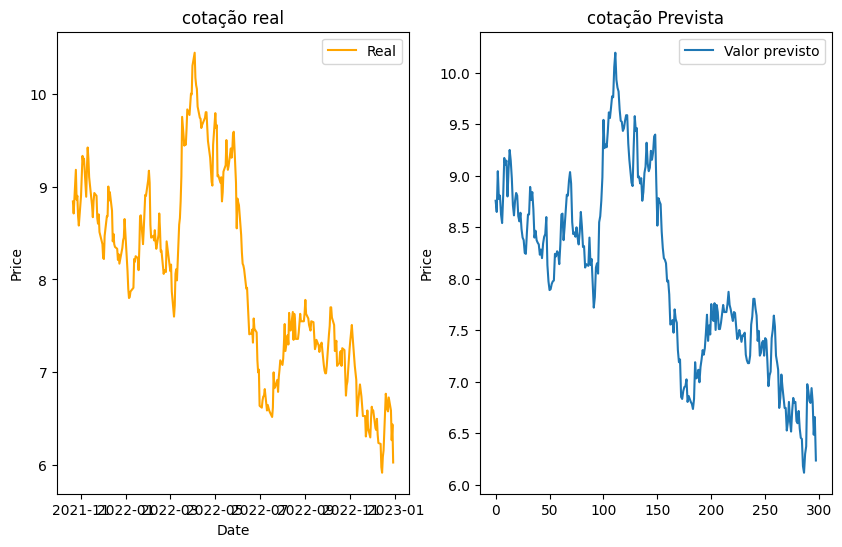

In [ ]:
dados_grnd_final = dados['Close_x'][-298:]
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Plot dos dados
ax[0].plot(dados_grnd_final, label= 'Real', color='orange')
ax[0].set_title('cotação real')
ax[0].set_ylabel('Price')
ax[0].set_xlabel('Date')
ax[0].legend()

ax[1].plot(predicoes, label="Valor previsto")
ax[1].set_title('cotação Prevista')
ax[1].set_ylabel('Price')
ax[0].set_xlabel('Date')
ax[1].legend()
plt.show()